# Statistická analýza, příprava dat

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

Pro tento příklad budeme používat podmnožinu s tohoto souboru.
!!! Vytvořený subset nemusí statisticky odpovídat původnímu souboru

## Sub dataset
- Data  = struktura s vyplněnými daty
- m 	= počet řádků = 100
- x’s = vstupní proměnná / features
- y’s = výstupní promměná / target
- (x, y) = jeden řádek z training dataset
- x(2) = (4, 5, 3374, 85)
- y(2) = 1 050 000

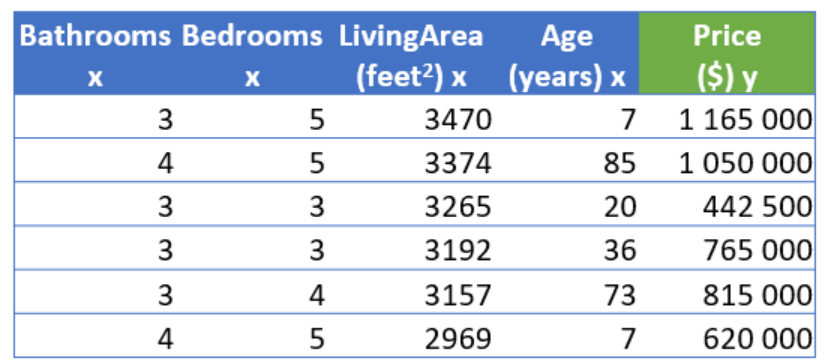

# Úkol
- Vytvořte regresní lineání model z parametrů, které jste vybrali minulé cvičení
- Data před zpracováním standardizujte
- Model vytvořte ručně
- Model vytvořte pomocí scikit-learn

# Načtení dat

In [669]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [670]:
df = pd.read_csv ("../dataset/portland_filtered.csv",  sep=';')

# Lineání model bez pomocí knihoven
- Vytvořte si ručně model lineární regrese bez pomoci externích knihoven
- Vypište jeho parametry
- Vypiše jeho skóre pro trénovací a validační data
- Vykreslete graf historie učení
- Vizualizujte model

Výstupní proměnná price je lineárně závislá na vstupních proměnných
- living area
- bedrooms

Cíl - model, který na základě living area a bedrooms odhadne price

1. Čištění

In [671]:
df = df.dropna()

2. Odebrání extrémních hodnot (pro price)

<Axes: xlabel='price', ylabel='Count'>

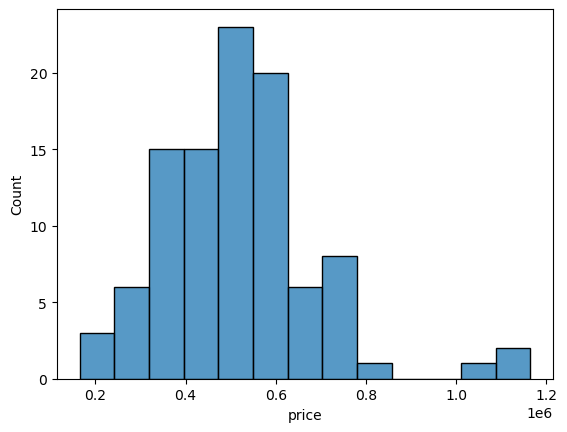

In [672]:
sns.histplot(df['price'])

In [673]:
df = df[~(df['price']>= 1_000_000)]

In [674]:
X = pd.DataFrame(np.c_[df['livingArea'],df['bedrooms']], columns = ['livingArea', 'bedrooms']).to_numpy()
Y = df['price'].to_numpy()

In [675]:
from sklearn.model_selection import train_test_split

In [676]:
def split_dataset (X, Y, train_ratio = 0.75, validation_ratio = 0.15, test_ratio = 0.10):
    assert(train_ratio + validation_ratio + test_ratio == 1.0)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 - train_ratio)

    X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 
    return X_train, Y_train, X_val, Y_val, X_test, Y_test

In [677]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = split_dataset(X, Y)
print (X_train.shape, Y_train.shape)
print (X_val.shape, Y_val.shape)
print (X_test.shape, Y_test.shape)

(72, 2) (72,)
(15, 2) (15,)
(10, 2) (10,)


In [678]:
def initialize(dim):
  
    bias=random.random()
    weights=np.random.rand(dim)
    return bias, weights

In [679]:
def print_model_params(bias, weights):

    print ("Model parameters\n================")
    print(f"Bias: {bias}")
    print (f"Weights: {weights}")  

In [680]:
def print_model_score(Y, Y_predicted):
    mse = mean_squared_error(Y, Y_predicted)
    r2 = r2_score(Y, Y_predicted)
    print(f"MSE: {mse}")
    print(f"R² Score: {r2}")

In [681]:
def predict(X, bias, weights):
    return bias + np.dot(X, weights)

In [682]:
def get_cost(Y, Y_predicted):
    return np.mean((Y - Y_predicted) ** 2) / 2

In [683]:
def print_cost (Y_train, Y_predicted):
    print (f"Cost function MSE: {get_cost(Y_train, Y_predicted)}")

In [684]:
def initialize(dim):
    bias=random.random()
    weights=np.random.rand(dim)
    return bias, weights

In [685]:
def update_weights(X, Y, Y_predicted, bias_0, weights_0, learning_rate):

    # výpočet parciálních derivací
    delta_bias = (np.sum(Y_predicted - Y))/len(Y)
    delta_weights = (np.dot((Y_predicted - Y),X))/len(Y)

    # výpočet úpravy parametrů modelu
    bias_1 = bias_0 - learning_rate * delta_bias
    weights_1 = weights_0 - learning_rate * delta_weights
    return bias_1, weights_1

In [686]:
def visualize_model_3D(X1, X2, Y, bias, weights, points=50):      
    x_label, y_label, z_label = "Living Area", "Bedrooms", "Price"
    
    fig = go.Figure()

    fig.add_trace(go.Scatter3d(
        x=X1, y=X2, z=Y,
        mode='markers',
        marker=dict(size=5, color=Y, colorscale='Viridis', opacity=0.8),
        name="Data"
    ))

    x_range = np.linspace(min(X1), max(X1), points)
    y_range = np.linspace(min(X2), max(X2), points)
    xs, ys = np.meshgrid(x_range, y_range)
    zs = xs * weights[0] + ys * weights[1] + bias
    zs = zs.reshape(xs.shape) 

    fig.add_trace(go.Surface(
        x=xs, y=ys, z=zs,
        colorscale="Blues",
        opacity=0.5,
        name="Model Surface"
    ))

    fig.update_layout(
        title="3D Model Visualization",
        scene=dict(
            xaxis_title=x_label,
            yaxis_title=y_label,
            zaxis_title=z_label
        )
    )
    fig.show()

In [687]:
def run_gradient_descent(X, Y, learning_rate=0.01, num_iterations=1000):
    bias, weights = initialize(X.shape[1])
    cost_history = []

    for i in range(num_iterations):
        Y_predicted = predict(X, bias, weights)
        cost = get_cost(Y, Y_predicted)
        cost_history.append((i, cost))
        bias, weights = update_weights(X, Y, Y_predicted, bias, weights, learning_rate)

    gd_iterations_df = pd.DataFrame(cost_history, columns=["iteration", "cost"])
    return gd_iterations_df, bias, weights

In [688]:
x_label, y_label, z_label = "Living Area (m²)", "Bedrooms", "Price"
X1 = X_train[:, 0]  
X2 = X_train[:, 1]  
Y = Y_train 
    
fig = go.Figure()

fig.add_trace(go.Scatter3d(
        x=X1, y=X2, z=Y,
        mode='markers',
        marker=dict(size=5, color=Y, colorscale='Viridis', opacity=0.8),
        name="Data"
))
fig.show()

In [689]:
bias, weights=initialize(X.shape[1])
print_model_params(bias, weights)

Model parameters
Bias: 0.16909888689849162
Weights: [0.60599753 0.67483954]


In [690]:
Y_predicted=predict(X_train, bias, weights)
Y_predicted[0:10]

array([1321.45022976, 1123.96387858,  791.80839278,  951.1857419 ,
       1413.76837964, 1495.97751701, 1579.6740175 , 1003.30152906,
        752.41855365, 1205.70470246])

In [691]:
print_cost(Y_train, Y_predicted)

Cost function MSE: 132235048578.6114


In [692]:
print_model_score (Y_train, Y_predicted)

MSE: 264470097157.2228
R² Score: -12.73191865079201


In [693]:
from sklearn.metrics import mean_squared_error, r2_score

In [694]:
visualize_model_3D (X1, X2, Y_train, bias, weights, 30)

In [695]:
bias, weights = update_weights(X_train, Y_train, Y_predicted, bias, weights, 0.01)

In [696]:
print_model_params(bias, weights)

Model parameters
Bias: 4952.901363524401
Weights: [10296335.27031747    16547.97440905]


In [697]:
Y_predicted=predict(X_train, bias, weights, )
print_cost(Y_train, Y_predicted)
print_model_score (Y_train, Y_predicted)

Cost function MSE: 2.2196217521709797e+20
MSE: 4.439243504341959e+20
R² Score: -23049611780.418674


In [698]:
from sklearn.metrics import mean_squared_error, r2_score

In [699]:
gd_iterations_df, bias, weights = run_gradient_descent(X_train,Y_train, learning_rate=0.001, num_iterations=500)

/var/folders/_t/7myzzq6j2t96zth6zh480z2r0000gr/T/ipykernel_44662/2042987850.py:2: RuntimeWarning:

overflow encountered in square

/opt/anaconda3/envs/cvika_ver9/lib/python3.9/site-packages/numpy/_core/_methods.py:127: RuntimeWarning:

overflow encountered in reduce

/var/folders/_t/7myzzq6j2t96zth6zh480z2r0000gr/T/ipykernel_44662/186010029.py:9: RuntimeWarning:

invalid value encountered in subtract



In [700]:
print_model_params(bias, weights)

Model parameters
Bias: nan
Weights: [nan nan]


In [701]:
Y_predicted=predict(X_train, bias, weights)
print_cost(Y_train, Y_predicted)
print_model_score (Y_train, Y_predicted)

Cost function MSE: nan


ValueError: Input contains NaN.

In [ ]:
visualize_model_3D(X1, X2, Y_train, bias, weights, 40)

In [ ]:
Y_val_predicted = predict(X_val, bias, weights, )
print_cost(Y_val, Y_val_predicted)
print_model_score (Y_val, Y_val_predicted)

Cost function MSE: nan


ValueError: Input contains NaN.

Text(0, 0.5, 'Cost or MSE')

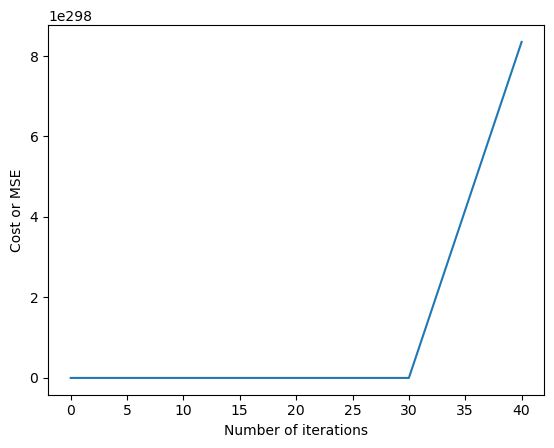

In [ ]:
fig2=plt.figure()
plt.plot(gd_iterations_df['iteration'], gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

# Linearní modelu pomocí scikit-learn
- Vytvořte si ručně model lineární regrese s pomocí externích knihoven
- Vypište jeho parametry
- Vypiše jeho skóre pro trénovací a validační data
- Vykreslete graf historie učení
- Vizualizujte model

1. Vytrénování modelu

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_model = LinearRegression()

In [ ]:
lin_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print ("Bias: ", lin_model.intercept_)
print("Weights: ", lin_model.coef_)

Bias:  172836.9705773843
Weights:  [  183.32154655 -8627.06140521]


In [ ]:
Y_predicted = lin_model.predict(X_train)

In [ ]:
def print_model_score(Y_train, Y_predicted):
    r2 = r2_score(Y_train, Y_predicted)
    rmse = (np.sqrt(mean_squared_error(Y_train, Y_predicted)))    
    print('R2 score: {}'.format(r2))    
    print('RMSE: {}'.format(rmse))

In [ ]:
print_model_score(Y_train, Y_predicted)

R2 score: 0.6528192675280069
RMSE: 86015.3534426188


In [ ]:
visualize_model_3D(X1, X2, Y_train, lin_model.intercept_, lin_model.coef_, 40)

2. Ověření modelu

In [ ]:
Y_val_predict = lin_model.predict(X_val)

In [ ]:
print_model_score(Y_val, Y_val_predict)

R2 score: 0.4832348558387519
RMSE: 85378.42656952426
